<a href="https://colab.research.google.com/github/rrl7012005/Scikit-Learn-ClassicalML-Course/blob/main/Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

Problem Statement:

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
alt
[link text](https://)
Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

##Downloading and PreProcessing


In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv') #This is a way to retrieve the dataset.

('medical.csv', <http.client.HTTPMessage at 0x7bb679db3460>)

In [ ]:
import pandas as pd

medical_df = pd.read_csv('medical.csv')
medical_df #prints the whole data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In pandas .info gives a summary of the datatypes and whether there are null and missing values.

.describe gives statistics, percentiles, means and the number of each data category to see if the data makes sense and do a high level inference. Only does it for numerical data. Can spot outliers and skews in data, have to treat appropriately.

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

##Data Visualization and Correlations

We will use matplotlib, seaborn and plotly. Plotly is used for interactive charts.

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


Change some settings from the default to our own

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Age is a discrete integer data, so we can visualize it using a histogram or boxplot. Also for a pandas object we can describe each column individually so here we can describe the age specifically.

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Btw plotly u pass in an entire dataframe and then the 2nd arg x = '' is the column we specify to plot.

In [ ]:
#Plotly histogram

#the marginal = box adds a boxplot on top.
fig = px.histogram(medical_df, x='age', title='Age Distribution', marginal='box', nbins=47)
fig.update_layout(xaxis_title='Age', yaxis_title='Count', bargap=0.1) #adjust aspects of the plot
fig.show()

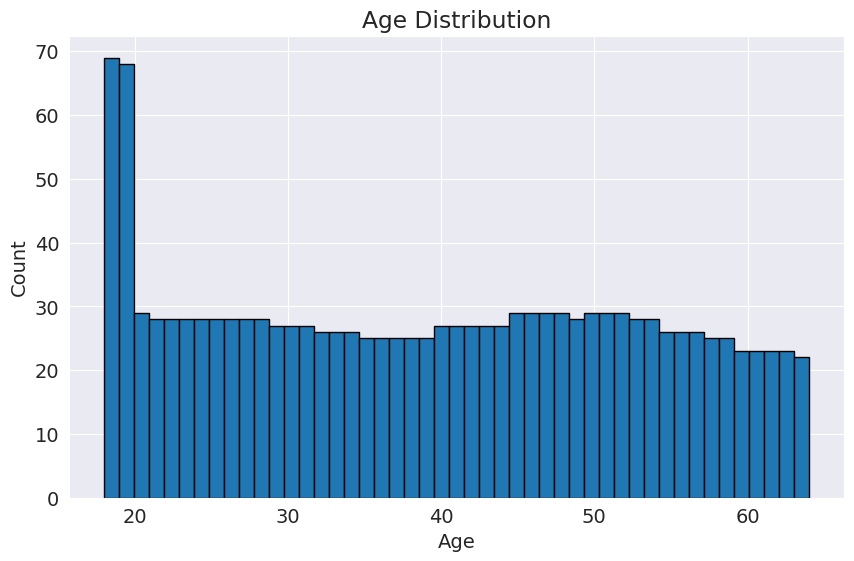

In [ ]:
#In matplotlib the histogram is given by

plt.figure(figsize=(10, 6))
plt.hist(medical_df['age'], bins = 47, edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

color_discrete_sequence passes a sequence of colors to use for different categories.

In [ ]:
fig = px.histogram(medical_df, x='bmi', title='Body Mass Index', marginal='box', nbins = 100, color_discrete_sequence=['red'])
fig.update_layout(xaxis_title='BMI', yaxis_title='Count', bargap=0.1)
fig.show()

Now for the charges but we want to split the histogram of charges into smokers and non-smokers. color='smoker' colors bars in histogram based on the smoker column so each different value in this column will have a different color.

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'gray'])
fig.update_layout(xaxis_title='Charges', yaxis_title='Count', bargap=0.1)
fig.show()

Visualize distribution of smoker column
.value_counts() gives the counts of the column of each category

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It is important to do this analysis as we want to make sure our data approximately reflects the distribution of the population otherwise it is null and the analyses we do is useless.

Now lets do relationship between variables and charges. Do opacity = 0.8 as we may have overlapping data so we want to see and also signle out the smoking column. Theres also a argument called hoverdata so whenever you hover over the data it will show you that category of each datapoint.

Can also shut off smoker by just clicking the categories

In [ ]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')

fig.update_traces(marker_size=5) #scatter point size
fig.show()

Now BMI and Charges

In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Doing all this helps to look for patterns in the data.

Violin plots are like scatter plots but for discrete x labels, the width corresponds to the frequency at a certain height.

In [ ]:
px.violin(medical_df, x='children', y='charges')

**Correlation Coefficients and Matrices**

pandas had a .corr method, wrap it around a column

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

For categorical data (not numerical), first convert to numerical then use the map function to map column values to another one given by a dictionary

In [ ]:
smoker_values = {'no': 0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values) #creates a new dataframe column
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
numeric_df = medical_df.select_dtypes(include=[float, int]) #only includes the numeric data
numeric_df.corr() #Computes correlation matrix

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

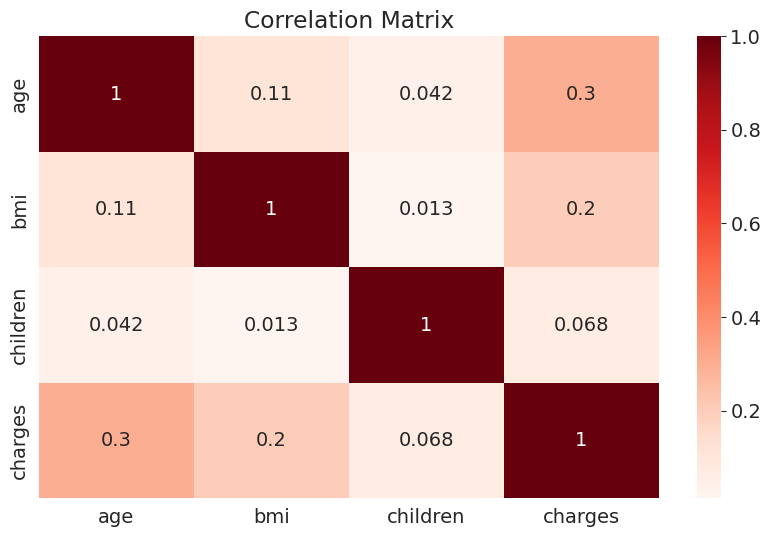

In [ ]:
#Visualize using a seaborn heatmap
#annot=True displays correlation value in each cell
#cmap is colormap is red here

sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

##Linear Regression with 1D inputs

Lets estimate charges with age for non-smokers as our 1D input problem

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no'] #masking

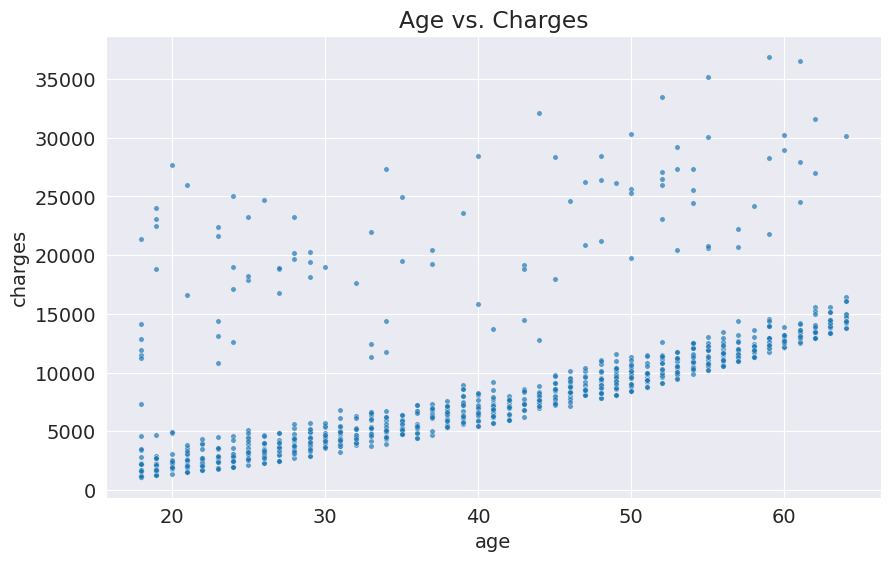

In [ ]:
plt.title('Age vs. Charges')
#sns scatterplot works similarly, pass dataframe and collect age and charges, alpha is transparency, s is marker size
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

#initialize
w = 50
b = 100

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b) #apply function to whole dataframe
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

RMSE Loss:  8044.90886266932


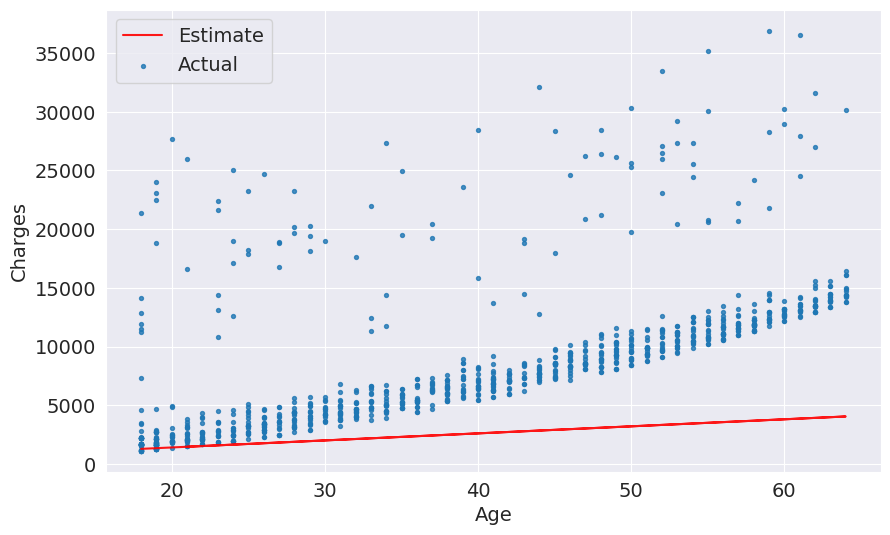

In [ ]:
#function to plot graph overlaid on original
import numpy as np

def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

    loss = rmse(target, predictions) #applies to the whole dataset
    print("RMSE Loss: ", loss) #Outliers are bad for RMSE

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

try_parameters(60, 200)

#This is a waste of time to try and error lol

**Regression with Scikit Learn**

In [ ]:
from sklearn.linear_model import LinearRegression #Import the model

model = LinearRegression() #create instance of this model, could also do stochastic gradient regressor model (same thing) all works the same, just parameters are different

help(model.predict) #gives us information about the arguments

#y can be 1D or 2D, datatype does not matter. But X must be 2D
#you can add your own weight by setting sample_weight arg to something

#reshape X to 2D
inputs = non_smoker_df[['age']] #wraps age col in an array
targets = non_smoker_df['charges']

print(inputs.shape, targets.shape)

model.fit(inputs, targets)
predictions = model.predict(inputs) #can also pass individual elements

print(rmse(targets, predictions))
#Done its that easy

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.

(1064, 1) (1064,)
4662.505766636395


Get the optimal coefficients

RMSE Loss:  4662.505766636395


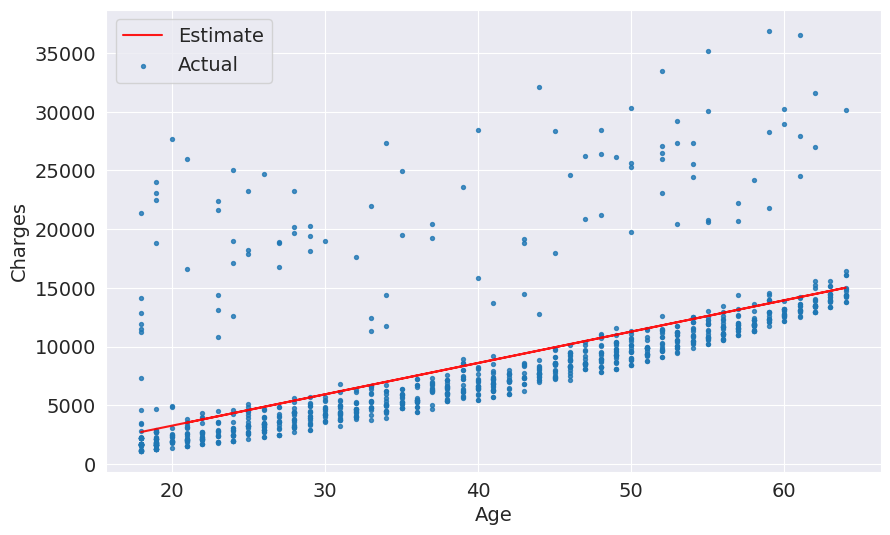

In [ ]:
w, b = model.coef_, model.intercept_ #gives weights and bias
try_parameters(w, b)

##Linear Regression with 2D input features

Now lets do age and bmi vs charges

In [ ]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

model = LinearRegression()

model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(loss, model.coef_, model.intercept_)

4662.3128354612945 [266.87657817   7.07547666] -2293.6320906488727


Bmi did not create a major impact on the loss as it had a very weak correlation with charges, there is no real relationship. As you can see the weight on the bmi feature is 7 which is very low. There's no relationship here so there is no point in doing machine learning with the bmi only.

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

You can plot a 3D graph here using px.scatter_3d and indicate the columns of the x y and z axes

In [ ]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

Now add one more feature, number of children

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

We can do a strip plot of children vs charges, similar to a violin plot but just with regular dots.

In [ ]:
fig = px.strip(non_smoker_df, x = 'children', y = 'charges')
fig.update_traces(marker_size=3, marker_opacity=0.8)
fig.show()

In [ ]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(loss, model.coef_, model.intercept_)

4608.470405038247 [265.2938443    5.27956313 580.65965053] -2809.2976032235892


Loss is a bit lower but not by much. Can do the same thing for smoker and compare. Now lets do the thing for the whole dataset. The loss will be much higher as non-smokers and smokers behave differently.

To account for smokers and non-smokers behavior separately we need some way to use categorical features. Either binary encoding or one hot encoding or if some categories have a natural order for example cold, neutral, warm, hot then just do (1, 2, 3, 4) etc.

**Binary categories**

Lets include the smoker data in our multilinear regression.

<Axes: xlabel='smoker', ylabel='charges'>

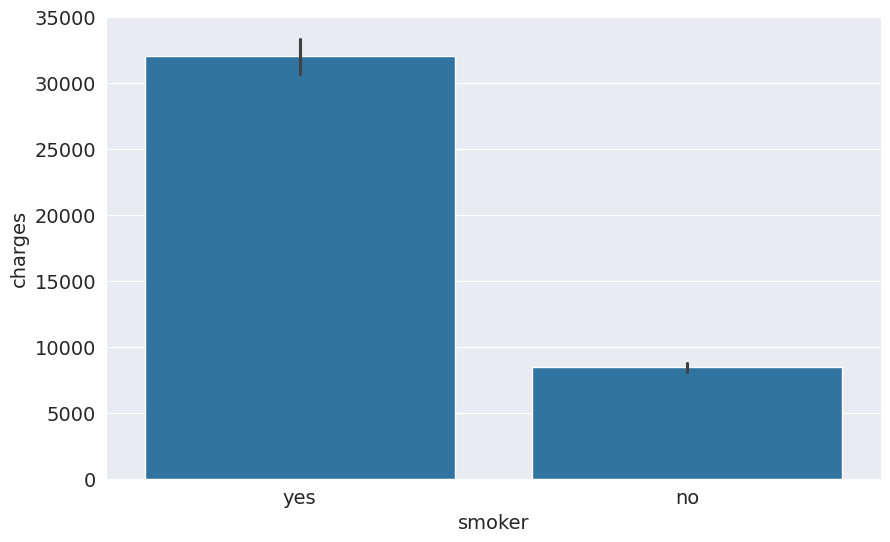

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes) #Create a new column, could have just modified the previous one
medical_df.charges.corr(medical_df.smoker_code), medical_df

(0.787251430498478,
       age     sex     bmi  children smoker     region      charges  \
 0      19  female  27.900         0    yes  southwest  16884.92400   
 1      18    male  33.770         1     no  southeast   1725.55230   
 2      28    male  33.000         3     no  southeast   4449.46200   
 3      33    male  22.705         0     no  northwest  21984.47061   
 4      32    male  28.880         0     no  northwest   3866.85520   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1333   50    male  30.970         3     no  northwest  10600.54830   
 1334   18  female  31.920         0     no  northeast   2205.98080   
 1335   18  female  36.850         0     no  southeast   1629.83350   
 1336   21  female  25.800         0     no  southwest   2007.94500   
 1337   61  female  29.070         0    yes  northwest  29141.36030   
 
       smoker_code  
 0               1  
 1               0  
 2               0  
 3               0  
 4               0  


In [ ]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss, model.coef_, model.intercept_)

Loss: 6056.439217188081 [  257.84950728   321.85140247   473.50231561 23811.3998446 ] -12102.7693627279


Loss is lower but still not as low as separating smoker and non-smoker. Now include sex, correlation is low so wont change much.

0.057292062202025484

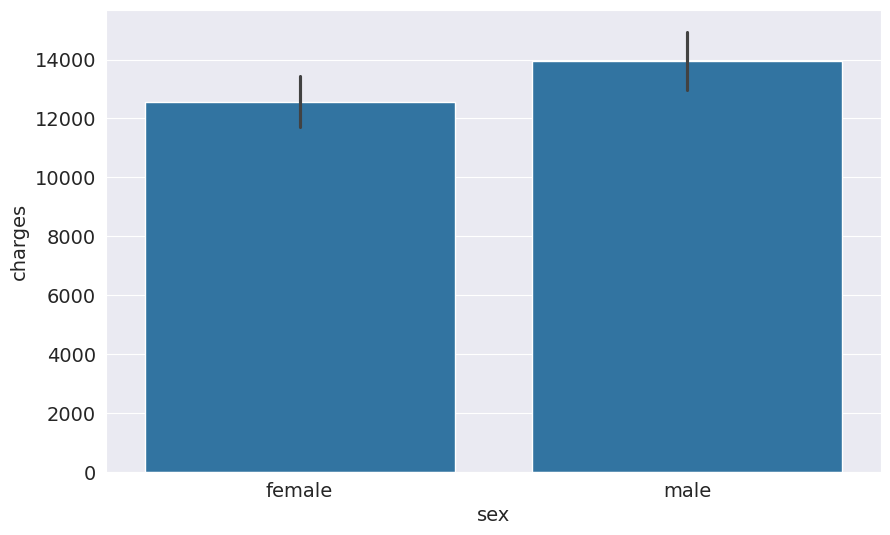

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

medical_df.charges.corr(medical_df.sex_code)

In [ ]:

inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


For regions do one hot encoding as theres no natural order and its not binary. Note: even if we have numerical categorical data for another feature, it may be best to do one hot encoding still because there may not be a natural order for that feature, so consider doing with and without.

For one hot encoding import the preprocessing library

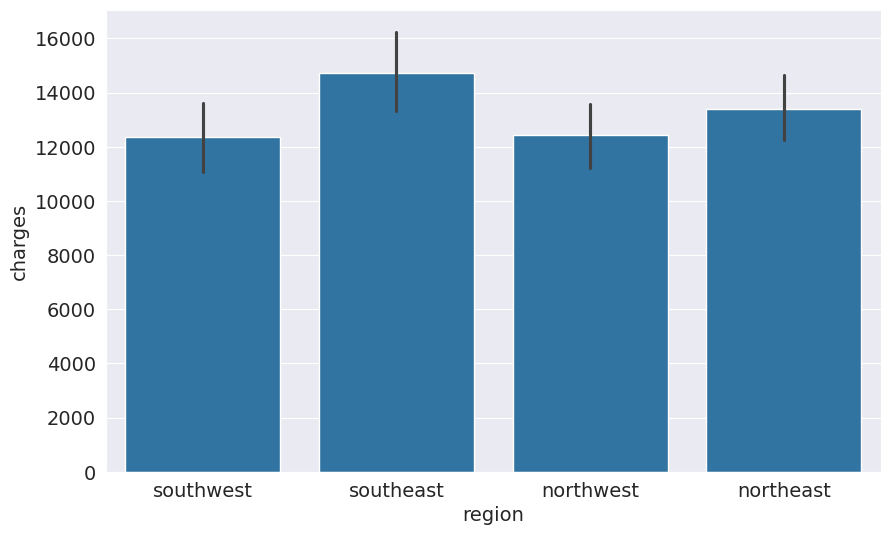

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder() #create instance of the class
enc.fit(medical_df[['region']]) #this fit will one hot encode that column
enc.categories_ #will output all the categories

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
#To see how this works look at the transform method
enc.transform([['southeast'], ['northwest']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [ ]:
#Apply to the dataset column

one_hot = enc.transform(medical_df[['region']]).toarray()
#so now add new columns 1 for each category
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss, model.coef_, model.intercept_)

Loss: 6041.6796511744515 [  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627] -12525.547811195444


Most of these other factors aren't really helping mainly it's age. One thing we can do is create 2 different linear regression models, one for smokers and one for non-smokers because we see correlation with these and we see how some factors like bmi strongly depend on smokers so perhaps its weight should not be fixed. Or another way is to use decision trees.

To examine the importance of each feature on the output we can look at the weights. However some features have different ranges so a direct comparison is not accurate. Also columns with larger ranges may disproportionately affect the loss and dominate optimization i.e. optimization will mainly occur about that point so its best to standardize.

This is how you create a dataframe in pandas, create instance of class the input of which is a dictionary. Each key is a column name. np.append is like np.concatenate

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

In [ ]:
from sklearn.preprocessing import StandardScaler #standardize
numeric_cols = ['age', 'bmi', 'children'] #only necessary for numerical cols as cat cols already range from 0 to 1 (one-hot encoding)
scaler = StandardScaler() #instance of class
scaler.fit(medical_df[numeric_cols]) #will calculate moments of each of the columns

#Then we need to apply the transformation

scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaler.mean_, scaler.var_, scaled_inputs

#Now combine with categorical data

cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values #gives the values only


inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1), #instead of concatenate
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False) #.sort_values sorts the data by the column

Loss: 6041.6796511744515


feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

Clearly smoker, age and bmi are the most important, hence why it may be considering separate models for smoker and non-smoker.

To create a test set we need train test split

In [ ]:
from sklearn.model_selection import train_test_split

#first arg is inputs, second is output and test_size is fraction for test

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

model = LinearRegression().fit(inputs_train, targets_train)

#Technically we should scale input and test separately

predictions_test = model.predict(inputs_test)
predictions_train = model.predict(inputs_train)

loss = rmse(targets_test, predictions_test)
loss_train = rmse(targets_train, predictions_train)
print('Test Loss:', loss)
print('Train Loss:', loss_train)

Test Loss: 6668.042214623115
Train Loss: 5971.1175474875445


#Logistic Regression

QUESTION: The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:

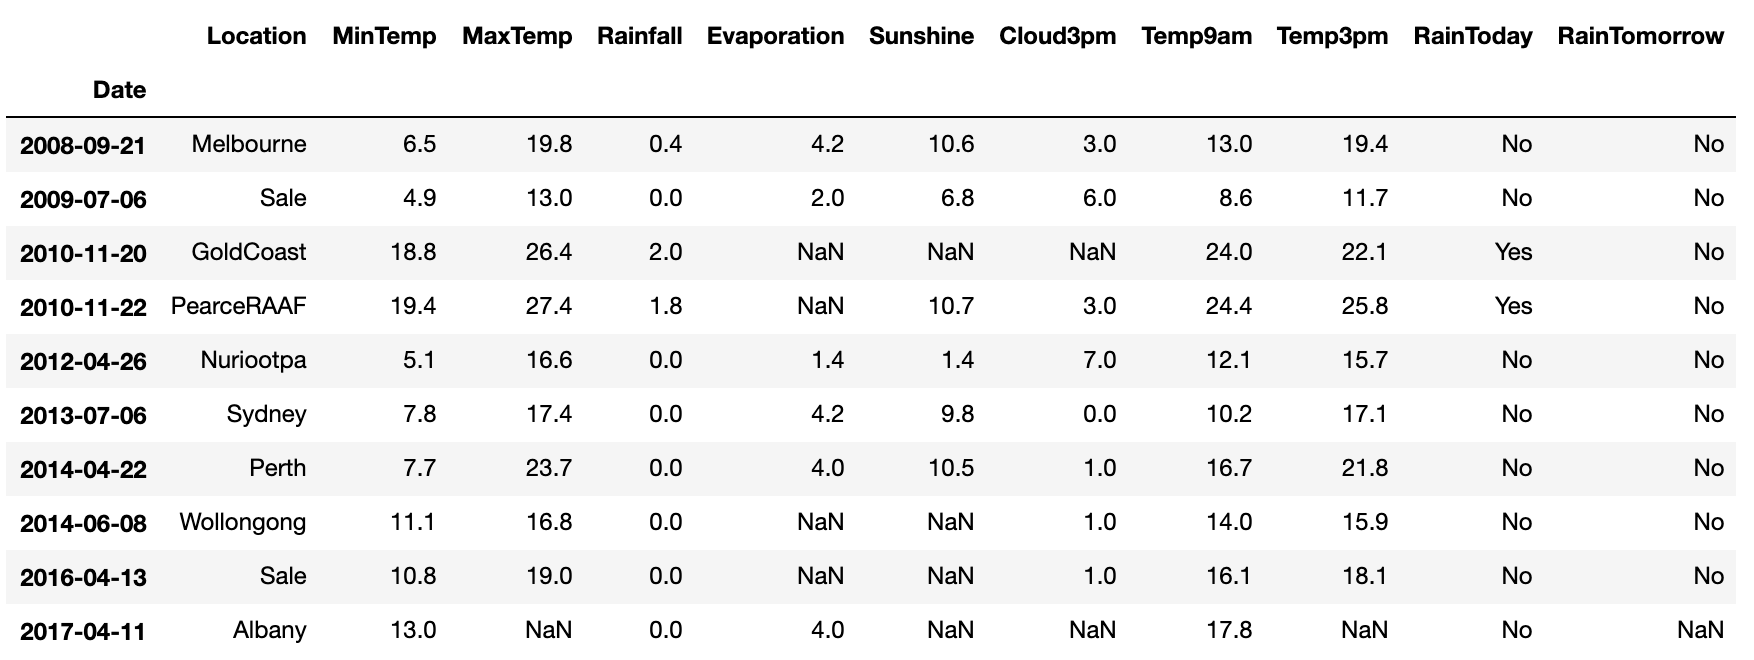

As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

alt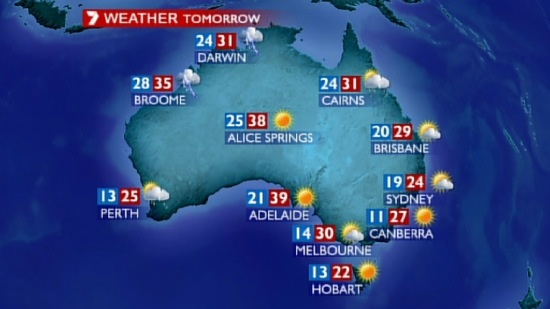

so we have null data that we have to deal with.

In [ ]:
!pip install opendatasets --upgrade --quiet

#Also have to upload kaggle.json file to access api

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url) #how to load kaggle datasets

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


Inspect this package

In [ ]:
import os
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
#Location of our csv file

train_csv = data_dir + '/weatherAUS.csv'
raw_df = pd.read_csv(train_csv)
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

RainToday and RainTomorrow have quite a few null values so these rows are completely useless as our target column has nulls. So we should obviously remove these. Now we can also do the same thing for rain today as we can hypothesize that if we dont know whether it rains today we cannot predict if it rains tomorrow. Gotta make these predictions

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True) #drop nulls on the following set
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

##Data Visualization

In [ ]:
raw_df.Location.unique() #Tells us what locations we have
raw_df.Location.nunique() #Tells us how many locations we have

49

In [ ]:
px.histogram(raw_df, x='Location', title='Location vs Rainy Days', color='RainToday')
#if no argument it will just plot the count (we colored)

In [ ]:
#We create hypotheses and investigate them

px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

It seems if the temperature is low the chances of rainfall is higher and vice versa when higher temperature.

In [ ]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

For most data points it did not rain on next day and for most it did. This is called class imbalance and we do not have an equal number of observations for each class so we have to deal with that.

We can see if it did rain today its a 50% chance of raining tomorrow ish and if it didnt rain today it will likely not rain tomorrow.

In [ ]:
px.scatter(raw_df.sample(2000), #returns a random sample of 2000 elements
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

When it rains the variation in temperature is smaller than when it didn't. We can investigate a lot of different factors and columns and how they effect the output.

##Data Preprocessing

When working with massive datasets do not shove the whole dataset inside immediately. Work with a sample first and test the model, make any potential improvements, try out ideas, point out obvious flaws and then consider going crazy.

In [ ]:
use_sample = False
sample_fraction = 0.1
if use_sample:
  raw_df = raw_df.sample(frac=sample_fraction).copy() #Take a copy of it

Now we'll create validation set to test the models during testing. It can be good to tune hyperparameters by using different for different sets and test validation, or use some cross-validation ideas.

In [ ]:
#How to get our split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42) #seed
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

train_df.shape, val_df.shape, test_df.shape

((84471, 23), (28158, 23), (28158, 23))

Now for time series data which is what we have here with dates. It is best practice to separate out the test, train and val data according to chronological order. our test data should be the most recent as it will be the best indicator of how our model performs in the current day, or otherwise it may have used training data from the future to gain an advantage which we cannot do ofcourse. We dont want models with just high accuracy we want them to work in the real world.

pd.to_datetime converts the date column to a number and .dt.year extracts the year

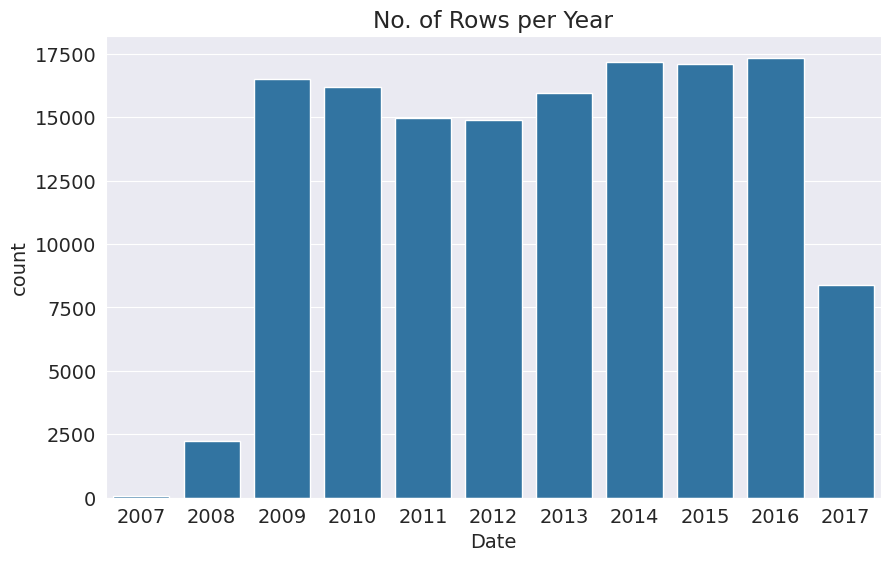

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
#So in this case extract data this way

year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [ ]:
input_cols = list(train_df.columns)[1:-1] #Date column and ids are useless for training and the output is output
target_col = 'RainTomorrow'

train_inputs = train_df[input_cols].copy() #So original data is not disturbed
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

Lets identify the numerical and categorical data as we'll convert the data later.

.select_dtypes selects the data types which are numpy numbers and the columns that are categorical are just object. Also our model can only predict on locations it has seen, do not input a new piece of data.

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
#if there were string columns you would have to do something special or type manually

numeric_cols, categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [ ]:
train_inputs[categorical_cols].nunique(), train_inputs[numeric_cols].describe()

(Location       49
 WindGustDir    16
 WindDir9am     16
 WindDir3pm     16
 RainToday       2
 dtype: int64,
             MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
 count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
 mean      12.007831     23.022202      2.372935      5.289991      7.609004   
 std        6.347175      6.984397      8.518819      3.952010      3.788813   
 min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
 25%        7.500000     17.900000      0.000000      2.600000      4.800000   
 50%       11.800000     22.400000      0.000000      4.600000      8.500000   
 75%       16.600000     27.900000      0.800000      7.200000     10.600000   
 max       33.900000     48.100000    371.000000     82.400000     14.300000   
 
        WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
 count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
 mean 

**Imputation**

Now we need to fill in the missing values. Btw we should inspect the statistics look for outliers and take appropriate cleaning methods.

The process of filling missing values is called imputation. There are several techniques but the simplest technique is to replace NaNs with the average of the column, or a fixed value, or a median if you think there are outliers that affect the average. Throwing away rows loses alot of data. Use skLearn Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

#First lets check how many missing values we have
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [ ]:
imputer.fit(raw_df[numeric_cols]) #Fit the imputer to the data, but we still have to apply the change

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

#Apply to each set, technically we should do this before splitting

train_inputs[numeric_cols].isna().sum(), list(imputer.statistics_) #gives the stats

(MinTemp          0
 MaxTemp          0
 Rainfall         0
 Evaporation      0
 Sunshine         0
 WindGustSpeed    0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Cloud9am         0
 Cloud3pm         0
 Temp9am          0
 Temp3pm          0
 dtype: int64,
 [12.18482386562048,
  23.235120301822324,
  2.349974074310839,
  5.472515506887154,
  7.630539861047281,
  39.97051988882308,
  13.990496092519967,
  18.631140782316862,
  68.82683277087672,
  51.44928834695453,
  1017.6545771543717,
  1015.2579625879797,
  4.431160817585808,
  4.499250233195188,
  16.98706638787991,
  21.69318269001107])

Now we scale the features. Now we will use MinMaxScaler instead of normal distribution. Remember scaling gives each dimension the same importance.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

print('Minimum:', list(scaler.data_min_), "Maximum:", list(scaler.data_max_))

train_inputs[numeric_cols].describe()

Minimum: [-8.5, -4.8, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 980.5, 977.1, 0.0, 0.0, -7.2, -5.4] Maximum: [33.9, 48.1, 371.0, 145.0, 14.5, 135.0, 130.0, 87.0, 100.0, 100.0, 1041.0, 1039.6, 9.0, 9.0, 40.2, 46.7]


MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

Now for categorical data perform OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Not sparse array, an optimisation technique
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #ignore categories not seen
encoder.fit(raw_df[categorical_cols])

#You can get the column names for each category with the following
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

train_inputs

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

<ipython-input-186-b8b588508548>:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-186-b8b588508548>:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-186-b8b588508548>:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-186-b8b588508548>:11: PerformanceWarn

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
0                W       0.294574          W        WNW  ...            0.0   
1              WNW       0.294574        NNW        WSW  ...            0.0   
2              WSW       0.310078          W        WSW  ...            0.0   
3               NE       0.139535         SE          E  ...            0.0   
4                W       0.271318        ENE         NW  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
144548         SSE       0.286822        ESE        SSE  ...            0.0   
144549          NE       0.193798        ENE         SW  ...            0.0   
144550         ESE       0.255814        ESE        SSE  ...            0.0   
144551         ESE       0.286822        ESE        SSW  ...            0.0   
144552         WNW       0.542636        ENE        SSW  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
144548            0.0  
144549            0.0  
144550            0.0  
144551            0.0  
144552            0.0  

[97988 rows x 123 columns]

Before continuing you should save the processed data to a disk especially for really large datasets to avoid repeating the preprocessing everytime

In [ ]:
!pip install pyarrow --quiet

train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Then download the parquet files and save to google drive and upload them later if on colab

To load the data

In [ ]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 320 ms, sys: 192 ms, total: 513 ms
Wall time: 631 ms


##Training Model

Sci kit learn can work with categorical training targets but not categorical input data.

<Axes: xlabel='weight', ylabel='feature'>

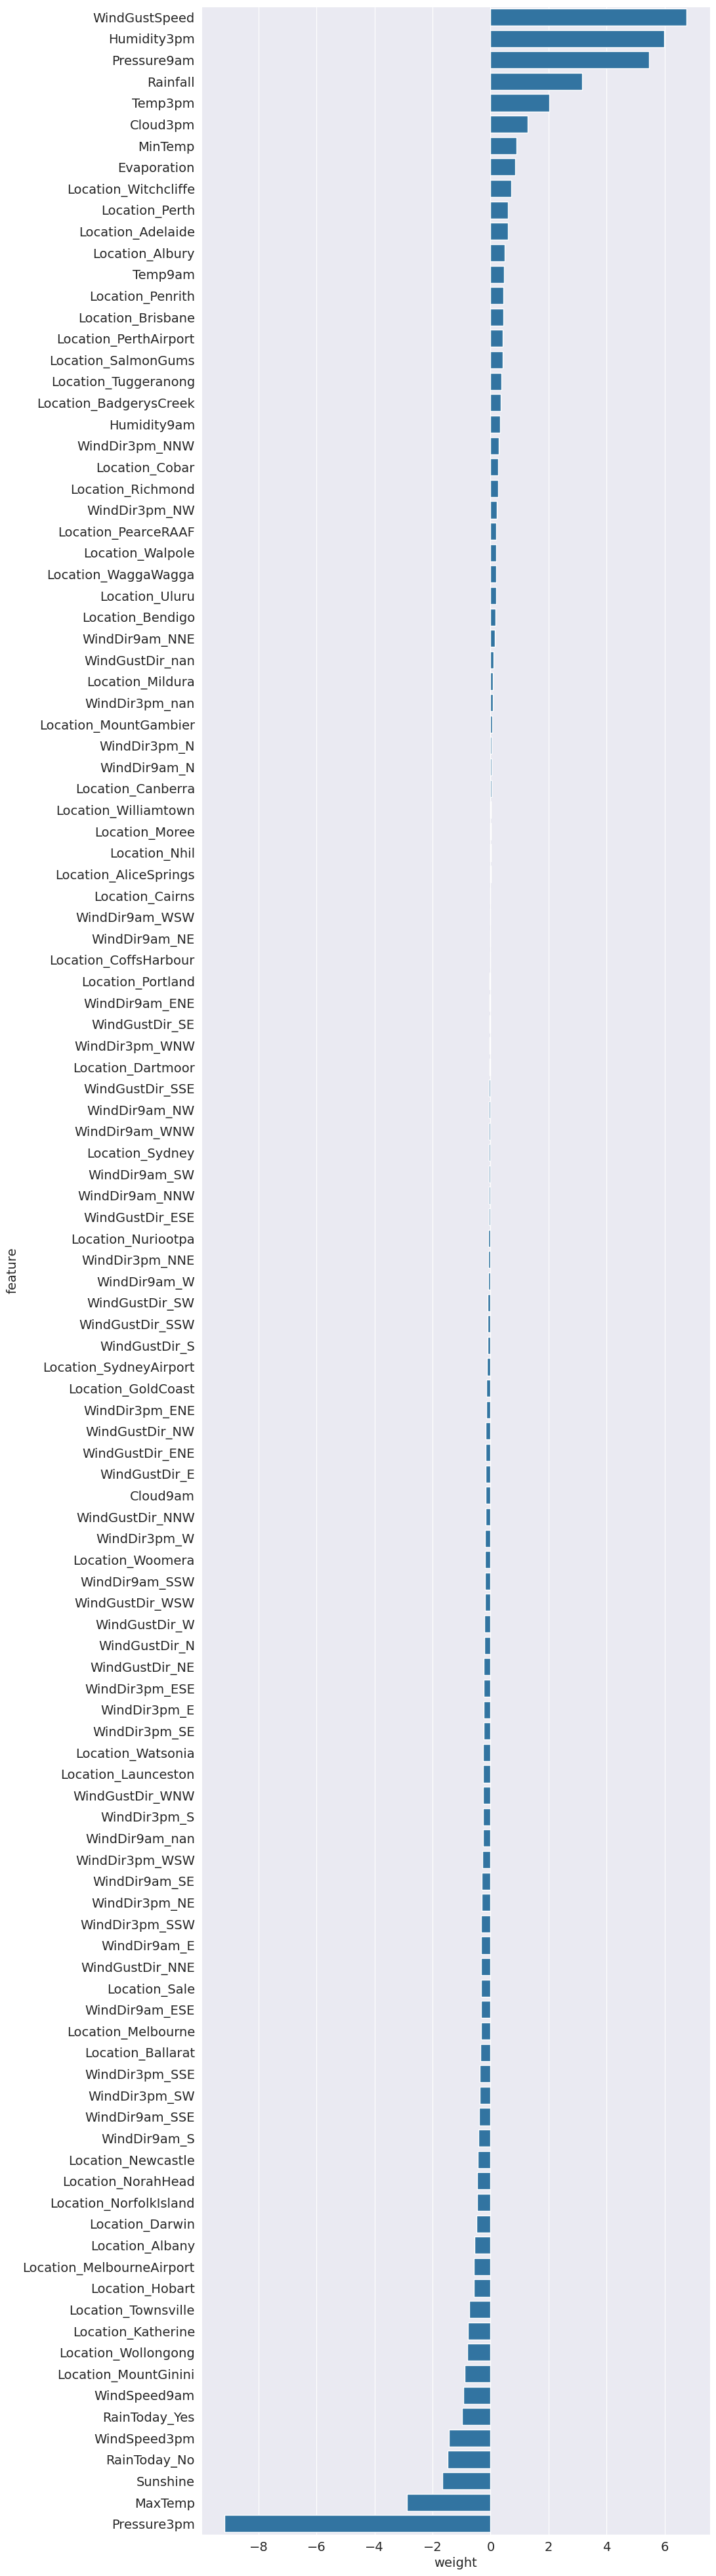

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') #Good for linear classification, can control model parameters in LogisticRegression class
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

weights = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

plt.figure(figsize=(10, 50))
sns.barplot(data=weights.sort_values('weight', ascending=False), x='weight', y='feature')

##Predictions and Postprocessing

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

train_probs = model.predict_proba(X_train) #offer probabiltiies, 1st col is no, 2nd is yes, can see that by calling:
print(model.classes_)

['No' 'Yes']


Evaluate the confusion matrix and accuracy score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("TRAIN ACCURACY: ", accuracy_score(train_targets, train_preds))
print("VAL ACCURACY: ", accuracy_score(val_targets, val_preds))
print("TEST ACCURACY: ", accuracy_score(test_targets, test_preds))

print("TRAIN ACCURACY: ", confusion_matrix(train_targets, train_preds)/len(train_targets))
print("VAL ACCURACY: ", confusion_matrix(val_targets, val_preds)/len(val_targets))
print("TEST ACCURACY: ", confusion_matrix(test_targets, test_preds)/len(test_targets))

TRAIN ACCURACY:  0.8519206433440829
VAL ACCURACY:  0.8539996488969512
TEST ACCURACY:  0.8420070011668611
TRAIN ACCURACY:  [[0.73572274 0.04182145]
 [0.10625791 0.1161979 ]]
VAL ACCURACY:  [[0.75768038 0.03294517]
 [0.11305518 0.09631927]]
TEST ACCURACY:  [[0.7327499  0.04068456]
 [0.11730844 0.1092571 ]]


Accuracy: 85.19%
['No' 'No' 'No' ... 'No' 'No' 'No']
Accuracy: 85.40%
['No' 'No' 'No' ... 'No' 'No' 'No']
Accuracy: 84.20%
['No' 'No' 'Yes' ... 'No' 'No' 'No']


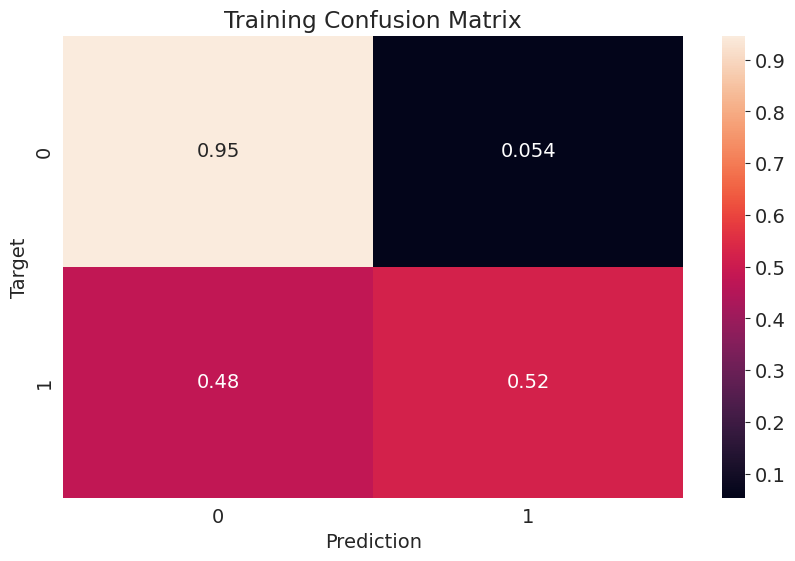

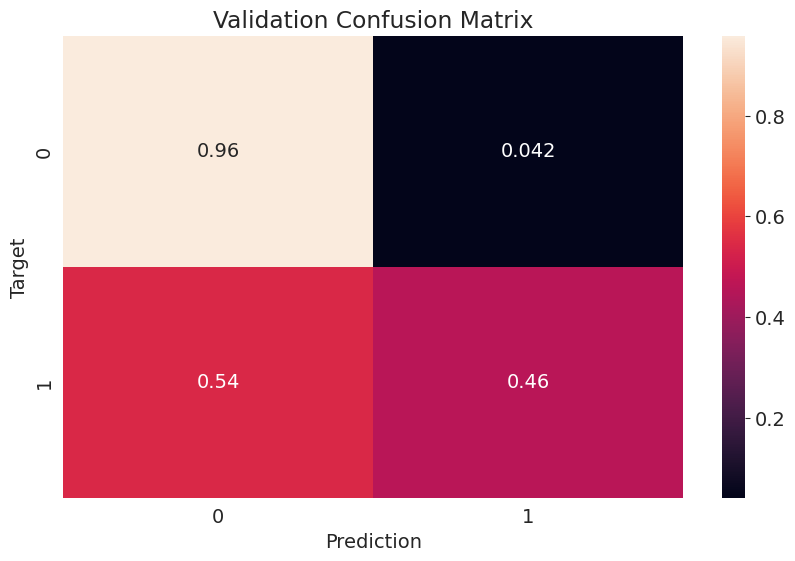

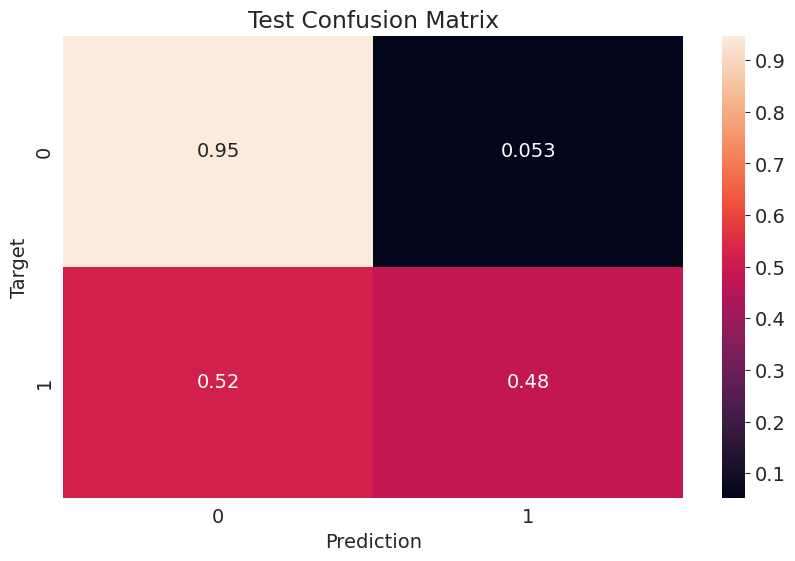

In [ ]:
#Best to put this in one function

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # cf = 100 * confusion_matrix(targets, preds) / len(targets)
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    print(preds)

train_preds = predict_and_plot(X_train, train_targets, 'Training')
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

To check how good our data and accuracy is, lets compare to a random dumb guess. Setting normalize to true in confusion matrix normalizes each row, so out of all negatives what is the accuracy etc. So you can see how well you predict for rainy days and for non-rainy days. You can also normalize all so you do not have to divide by len(targets).

Another thing you can do is compare to an expert human baseline, tell 1000 meterologists to make 1000 predictions and average them and compare them to our model.

In [ ]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

def all_no(inputs):
    return np.full(len(inputs), "No")

#2 types of dumb models
accuracy_score(test_targets, random_guess(X_test)), accuracy_score(test_targets, all_no(X_test))

(0.4957604045118631, 0.7734344612991054)

**Predicting a single input**

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

new_input_df = pd.DataFrame([new_input])

#Use the original imputer, encoder and scaler to fill NaNs
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

X_new_input = new_input_df[numeric_cols + encoded_cols] #Also inputs will be in same order as the columns that model expects
prediction = model.predict(X_new_input)[0]
prob = model.predict_proba(X_new_input)[0]

print(prediction, prob)

Yes [0.48103629 0.51896371]


<ipython-input-194-f5c7f38f2105>:29: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-194-f5c7f38f2105>:29: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-194-f5c7f38f2105>:29: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-194-f5c7f38f2105>:29: PerformanceWarn

In [ ]:
#Define a function for single novel inputs doing all of this

def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)] #only take prob of rain
    print(pred, prob)

predict_input(new_input)

Yes 0.5189637106904185


<ipython-input-197-e744c66d7c0b>:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-197-e744c66d7c0b>:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-197-e744c66d7c0b>:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-197-e744c66d7c0b>:7: PerformanceWarning:

##Saving model



Use joblib to save the model

In [ ]:
import joblib

#create dictionary of all objects you want to store
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

joblib.dump(aussie_rain, 'aussie_rain.joblib') #save to disk

['aussie_rain.joblib']

In [ ]:
#Load data

aussie_rain2 = joblib.load('aussie_rain.joblib')
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8420070011668611